<a href="https://colab.research.google.com/github/davidfox87/neuro_encoding_models/blob/master/filter_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparison of basis vector strength between neural and behavioral parameters

Content creator: David Fox

In [2]:
#@title Clone the github repository 
!git clone https://github.com/davidfox87/neuro_encoding_models

Cloning into 'neuro_encoding_models'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 659 (delta 28), reused 20 (delta 10), pack-reused 598
Receiving objects: 100% (659/659), 84.59 MiB | 41.52 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%cd neuro_encoding_models/

/content/neuro_encoding_models


In [5]:
#@title add package to google colab
import sys, os
sys.path.append(os.getcwd())

In [6]:
#@title import modules

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pickle


# load pickle files

In [10]:
pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/vmoves_out.pkl', 'rb')
vmoves_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/vymoves_out.pkl', 'rb')
vymoves_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/angvturns_out.pkl', 'rb')
angvturns_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/pn1_out.pkl', 'rb')
pn1_out = pickle.load(pkl_file)

dt = 0.001
t = np.arange(len(vmoves_out['response'])) * dt
tpn = np.arange(len(pn1_out['response'])) * dt

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/basis.pkl', 'rb')
basis = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/average_neural_data.pkl', 'rb')
average_neural_data = pickle.load(pkl_file)

orn_mu = average_neural_data['mean_orn_stim_filter']
orn_mu2 = average_neural_data['mean_orn_postspike_filter']
orn_predictions_mu = average_neural_data['mean_orn_psth_prediction']
orn_exp_responses_mu = average_neural_data['mean_orn_psth_experiment']
pn_mu = average_neural_data['mean_pn_stim_filter']
pn_mu2 = average_neural_data['mean_pn_postspike_filter']
pn_predictions_mu = average_neural_data['mean_pn_psth_prediction']
orn_exp_responses_mu = average_neural_data['mean_pn_psth_experiment']
orn_basis_weights = average_neural_data['orn_basis_weights']
pn_basis_weights = average_neural_data['pn_basis_weights']

In [8]:
font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

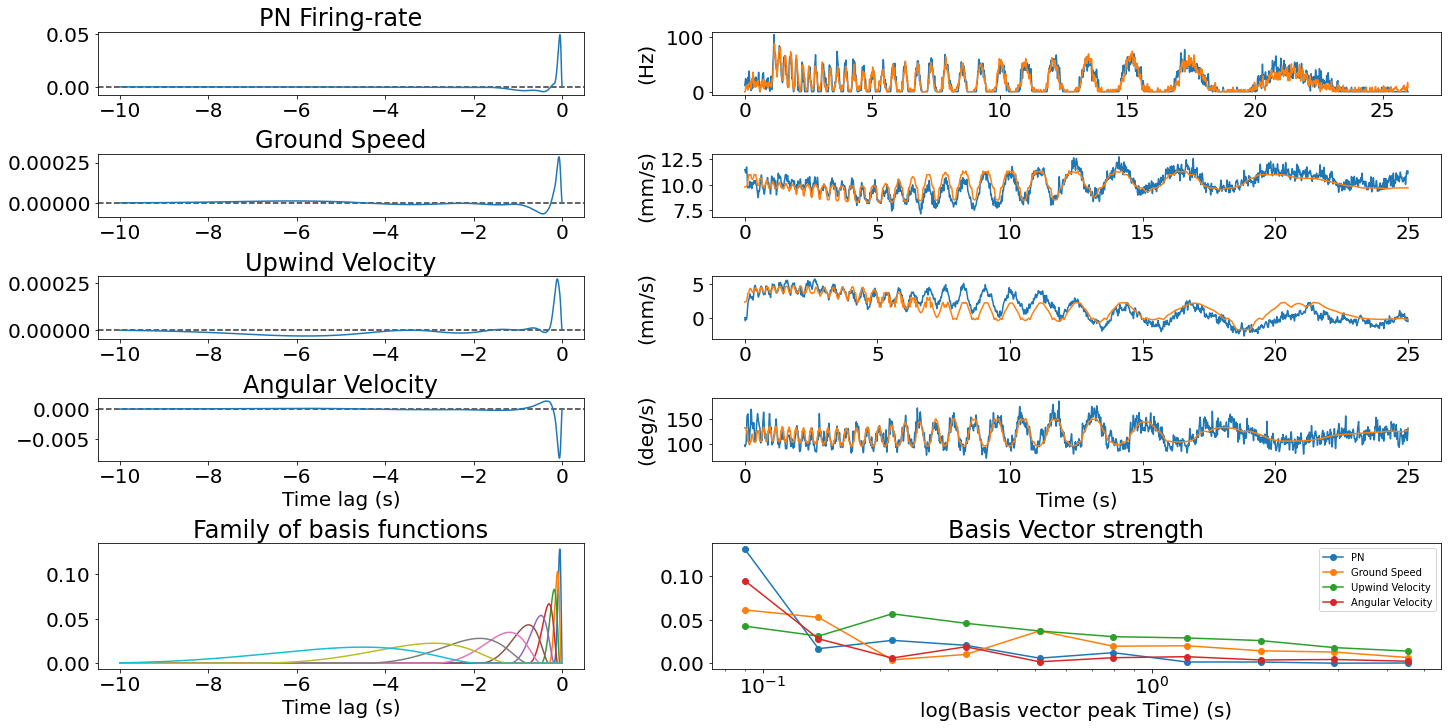

In [ ]:
fig = plt.figure(figsize=[20, 10])
ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2), colspan=2)

ax4 = plt.subplot2grid((2, 4), (1, 0))
ax5 = plt.subplot2grid((2, 4), (1, 1))
ax6 = plt.subplot2grid((2, 4), (1, 2), colspan=2)


ax1.plot(kt, orn_mu, lw=2, label='mean population 1', color='blue')
ax1.fill_between(kt, orn_mu + orn_sigma, orn_mu - orn_sigma, facecolor='blue', alpha=0.5)
ax1.axhline(0, color=".2", linestyle="--", zorder=1)

ax2.plot(ht, orn_mu2, lw=2, label='mean population 1', color='blue')
ax2.fill_between(ht, orn_mu2 + orn_sigma2, orn_mu2 - orn_sigma2, facecolor='blue', alpha=0.5)
ax2.axhline(0, color=".2", linestyle="--", zorder=1)


ax3.plot(orn_exp_responses_mu)
ax3.plot(orn_predictions_mu)



ax4.plot(kt, pn_mu, lw=2, label='mean population 1', color='blue')
ax4.fill_between(kt, pn_mu + pn_sigma, pn_mu - pn_sigma, facecolor='blue', alpha=0.5)
ax4.axhline(0, color=".2", linestyle="--", zorder=1)

ax5.plot(ht, pn_mu2, lw=2, label='mean population 1', color='blue')
ax5.fill_between(ht, pn_mu2 + pn_sigma2, pn_mu2 - pn_sigma2, facecolor='blue', alpha=0.5)
ax5.axhline(0, color=".2", linestyle="--", zorder=1)

ax6.plot(pn_exp_responses_mu)
ax6.plot(pn_predictions_mu)



